<font size="+2" color="blue">Additional results: Heap's law</font>

Author: <font color="blue">Guillem Escriba Molto</font>

E-mail: <font color="blue">guillem.escriba01@estudiant.upf.edu</font>

Date: <font color="blue">25/11/2022</font>

In [23]:
import io
import nltk
import gzip
import random
import statistics
import secrets
import re

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\guill\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 0. Dataset and how to iterate

In [3]:
# Leave this code as-is

INPUT_FILE = "movie_lines.tsv.gz"

In [4]:
# Leave this code as-is

# Producer in Python that reads a filename by words
def read_by_words(filename, max_words=-1, report_every=-1):
    
    # Open the input file
    with gzip.open(INPUT_FILE, "rt", encoding='utf8') as file:
        
        # Initialize counter of words to stop at max_words
        counter = 0
    
        # Regular expression to identify words having 3 letters or more and beginning with a-z
        word_expr = re.compile('^[a-z]{2,}$', re.IGNORECASE)

        # Iterate through lines in the file
        for line in file:
            
            elements = line.split("\t")
            
            text = ""
            if len(elements) >= 5:
                text = elements[4].strip()
                                        
            if counter > max_words and max_words != -1:
                break
                
            for word in nltk.word_tokenize(text):
                          
                if word_expr.match(word):
                    counter += 1
                    
                    # Report
                    if (report_every != -1) and (counter % report_every == 0):
                        if max_words == -1:
                            print("- Read %d words so far" % (counter))
                        else:
                            print("- Read %d/%d words so far" % (counter, max_words))

                    # Produce the word in lowercase
                    yield word.lower()

In [5]:
# Leave this code as-is

# Iterate through the file
for word in read_by_words(INPUT_FILE, max_words=300000, report_every=100000):
    # Prints 1/10000 of words
    if random.random() < 0.0001:
        print("Current word '%s'" % (word)) 

Current word 'is'
Current word 'did'
Current word 'down'
Current word 'it'
Current word 'here'
Current word 'get'
Current word 'got'
- Read 100000/300000 words so far
Current word 'pornos'
Current word 'for'
Current word 'morning'
Current word 'redmondstown'
Current word 'been'
Current word 'the'
Current word 'in'
Current word 'light'
Current word 'day'
Current word 'no'
Current word 'the'
Current word 'failed'
Current word 'is'
Current word 'know'
Current word 'matter'
- Read 200000/300000 words so far
Current word 'you'
Current word 'jesus'
Current word 'it'
Current word 'more'
Current word 'from'
Current word 'so'
Current word 'ah'
Current word 'benatar'
Current word 'be'
- Read 300000/300000 words so far


# 1. Determine approximately the top-5 words

In [6]:
def add_to_reservoir(reservoir, item, max_reservoir_size):
    if len(reservoir) < max_reservoir_size: # if there is space in the reservoir we add items
        reservoir.append(item)
    else: # if the reservoir is full we delete a random item and add a new one
        idx = random.randint(0, len(reservoir)-1)  # item deleted
        reservoir.pop(idx)
    assert(len(reservoir) <= max_reservoir_size)

In [7]:
def reservoir_sampling(filename, reservoir_size, max_words=-1, report_every=-1):
    reservoir = []

    words_read = 0

    for word in read_by_words(filename, max_words=max_words, report_every=report_every):
        words_read += 1
        p = random.uniform(0,1)
        if p <= reservoir_size/words_read: # If reservoir is not full, reservoir_size/words_read > 1 so every element will be added
            add_to_reservoir(reservoir, word, reservoir_size)
            

    return (words_read, reservoir)

In [8]:
# Leave this code as-is

reservoir_size = 1000
(items_seen, reservoir) = reservoir_sampling(INPUT_FILE, reservoir_size, max_words=1000000, report_every=100000)

print("Number of items seen    : %d" % items_seen)
print("Number of items sampled : %d" % len(reservoir) )

- Read 100000/1000000 words so far
- Read 200000/1000000 words so far
- Read 300000/1000000 words so far
- Read 400000/1000000 words so far
- Read 500000/1000000 words so far
- Read 600000/1000000 words so far
- Read 700000/1000000 words so far
- Read 800000/1000000 words so far
- Read 900000/1000000 words so far
- Read 1000000/1000000 words so far
Number of items seen    : 1000028
Number of items sampled : 999


In [9]:
# Leave this code as-is

freq = {}
for item in reservoir:
    freq[item] = reservoir.count(item)

most_frequent_items = sorted([(frequency, word) for word, frequency in freq.items()], reverse=True)[:10]
for absolute_frequency, word in most_frequent_items:
    print("%d %s" % (absolute_frequency, word))

58 you
30 the
29 to
21 it
21 and
18 do
16 is
15 in
13 we
12 did


In [10]:
for absolute_frequency, word in most_frequent_items:
    print("The word '{}' appeared {} times, {}%".format(word,absolute_frequency,round((absolute_frequency/len(reservoir))*100,2)))

The word 'you' appeared 58 times, 5.81%
The word 'the' appeared 30 times, 3.0%
The word 'to' appeared 29 times, 2.9%
The word 'it' appeared 21 times, 2.1%
The word 'and' appeared 21 times, 2.1%
The word 'do' appeared 18 times, 1.8%
The word 'is' appeared 16 times, 1.6%
The word 'in' appeared 15 times, 1.5%
The word 'we' appeared 13 times, 1.3%
The word 'did' appeared 12 times, 1.2%


In [11]:
reservoir_sizes = [50, 100, 500, 1000, 2000, 5000, 10000, 20000, 50000]
idx = 1
for reservoir_size in reservoir_sizes:
    print("\nIteration {}: Reservoir size = {}".format(idx, reservoir_size))
    words = []
    
    for i in range(2): # To check if there are the same top-3 words in two consecutive runs of the algorithm
        
        print("\nRun {}:\n".format(i+1))
        (items_seen, reservoir) = reservoir_sampling(INPUT_FILE, reservoir_size, max_words=1000000, report_every=100000)
        print("\nNumber of items seen    : %d" % items_seen)
        print("Number of items sampled : %d\n" % len(reservoir) )
        freq = {}
        for item in reservoir:
            freq[item] = reservoir.count(item)

        most_frequent_items = sorted([(frequency, word) for word, frequency in freq.items()], reverse=True)[:10]
        top3 = 0
        for absolute_frequency, word in most_frequent_items:
            if top3 < 3:
                words.append(word)
                top3 += 1
            absolute_frequency = round(absolute_frequency * (items_seen/reservoir_size))
            print("ESTIMATION OF THE ENTIRE DATASET: The word '{}' appeared {} times, {}%".format(word,absolute_frequency,round((absolute_frequency/items_seen)*100,2)))
    
              
    same_top3 = True
    for j in range(top3):
        if words[j] != words[j+top3]:
            print("\nDIFFERENT: Both iterations with {} reservoir size are not the same.\nTop Word {}: '{}' is different to '{}'".format(reservoir_size,j+1, words[j], words[j+top3]))
            same_top3 = False
            break
    if same_top3:
        print("EQUAL: Both iterations with {} reservoir size ARE THE SAME so we can use that reservoir size.".format(reservoir_size))
    
    idx += 1
    
    


Iteration 1: Reservoir size = 50

Run 1:

- Read 100000/1000000 words so far
- Read 200000/1000000 words so far
- Read 300000/1000000 words so far
- Read 400000/1000000 words so far
- Read 500000/1000000 words so far
- Read 600000/1000000 words so far
- Read 700000/1000000 words so far
- Read 800000/1000000 words so far
- Read 900000/1000000 words so far
- Read 1000000/1000000 words so far

Number of items seen    : 1000028
Number of items sampled : 49

ESTIMATION OF THE ENTIRE DATASET: The word 'to' appeared 80002 times, 8.0%
ESTIMATION OF THE ENTIRE DATASET: The word 'there' appeared 40001 times, 4.0%
ESTIMATION OF THE ENTIRE DATASET: The word 'the' appeared 40001 times, 4.0%
ESTIMATION OF THE ENTIRE DATASET: The word 'me' appeared 40001 times, 4.0%
ESTIMATION OF THE ENTIRE DATASET: The word 'your' appeared 20001 times, 2.0%
ESTIMATION OF THE ENTIRE DATASET: The word 'you' appeared 20001 times, 2.0%
ESTIMATION OF THE ENTIRE DATASET: The word 'why' appeared 20001 times, 2.0%
ESTIMATI

In [12]:
(items_seen, reservoir) = reservoir_sampling(INPUT_FILE, reservoir_size=1000000, max_words=1000000, report_every=100000)

- Read 100000/1000000 words so far
- Read 200000/1000000 words so far
- Read 300000/1000000 words so far
- Read 400000/1000000 words so far
- Read 500000/1000000 words so far
- Read 600000/1000000 words so far
- Read 700000/1000000 words so far
- Read 800000/1000000 words so far
- Read 900000/1000000 words so far
- Read 1000000/1000000 words so far


In [13]:
# IT TAKES TOO MANY TIME TO EXECUT THIS CODE SINCE IS O(n^2), DUE TO THE COUNT FUNCTION SO IF WE ARE WORKING WITH A 
# RESERVOIR SIZE OF 1 000 000 IT IS COMPUTATIONALLY UNEFFICIENT 

"""

freq = {}
items_processed = 0
reservoir_size = len(reservoir)
for item in reservoir:
    freq[item] = reservoir.count(item)
    items_processed += 1
    if items_processed % 1000 ==  0:
        print("Items counted: {}/{}".format(items_processed,reservoir_size))

most_frequent_items = sorted([(frequency, word) for word, frequency in freq.items()], reverse=True)[:10]
for absolute_frequency, word in most_frequent_items:
    print("The word '{}' appeared {} times, {}%".format(word,absolute_frequency,round((absolute_frequency/reservoir_size)*100,2))) 
    
"""

'\n\nfreq = {}\nitems_processed = 0\nreservoir_size = len(reservoir)\nfor item in reservoir:\n    freq[item] = reservoir.count(item)\n    items_processed += 1\n    if items_processed % 1000 ==  0:\n        print("Items counted: {}/{}".format(items_processed,reservoir_size))\n\nmost_frequent_items = sorted([(frequency, word) for word, frequency in freq.items()], reverse=True)[:10]\nfor absolute_frequency, word in most_frequent_items:\n    print("The word \'{}\' appeared {} times, {}%".format(word,absolute_frequency,round((absolute_frequency/reservoir_size)*100,2))) \n    \n'

<font size="+1" >After trying several reservoir sizes we need at least a reservoir size of 500 to have similar results between iterations as we can see above where we have checked if two consecutive iterations of determined size gives the same results. I think that a reservoir size between 10k to 50k would be a middle point between accuracy and efficiency.</font>

# 2. Determine approximately the distinct number of words

In [14]:
# Leave this code as-is

def count_trailing_zeroes(number):
    count = 0
    while number & 1 == 0:
        count += 1
        number = number >> 1
    return count

In [15]:
# Leave this code as-is

def random_hash_function():
    # We use a cryptographically safe generator for the salt of our hash function
    salt = secrets.token_bytes(32)
    return lambda string: hash(string + str(salt))

In [17]:
number_of_passes = 20
estimates = []

for i in range(number_of_passes):
    print("Pass %d of %d\n"%(i+1,number_of_passes))
    R = 0
    h = random_hash_function() # creates the hash function, one for each pass
    for word in read_by_words(INPUT_FILE, report_every=100000): 
        number = h(word) # transforms the word on a hash number
        r = count_trailing_zeroes(number) # count the zeros
        if r>R:
            R = r # states the number of zeros to the maximum
    
    estimate = 2**R # estimates the number of words by the total number of binary zeroes 
        

    estimates.append(estimate)
    print("Estimate on pass %d: %d distinct words" % (i+1, estimate))



Pass 1 of 20

- Read 100000 words so far
- Read 200000 words so far
- Read 300000 words so far
- Read 400000 words so far
- Read 500000 words so far
- Read 600000 words so far
- Read 700000 words so far
- Read 800000 words so far
- Read 900000 words so far
- Read 1000000 words so far
- Read 1100000 words so far
- Read 1200000 words so far
- Read 1300000 words so far
- Read 1400000 words so far
- Read 1500000 words so far
- Read 1600000 words so far
- Read 1700000 words so far
- Read 1800000 words so far
- Read 1900000 words so far
- Read 2000000 words so far
- Read 2100000 words so far
- Read 2200000 words so far
- Read 2300000 words so far
- Read 2400000 words so far
- Read 2500000 words so far
- Read 2600000 words so far
- Read 2700000 words so far
- Read 2800000 words so far
- Read 2900000 words so far
Estimate on pass 1: 65536 distinct words
Pass 2 of 20

- Read 100000 words so far
- Read 200000 words so far
- Read 300000 words so far
- Read 400000 words so far
- Read 500000 words 

In [18]:
# Leave this code as-is

print("* Average of estimates: %.1f" % statistics.mean(estimates))
print("* Median  of estimates: %.1f" % statistics.median(estimates))

* Average of estimates: 104038.4
* Median  of estimates: 49152.0


<font size="+1">I personally thing that the best idea is to use the median instead of the average because a simple outlier, since we are working with powers of 2 can change drastically the average while it only moves the median one position to right so is less sensible to the outliers.</font>

In [19]:
from collections import Counter

def counting(INPUT_FILE, max_words): 
    words = read_by_words(INPUT_FILE, max_words = max_words)
    n_words = len(Counter(words).keys())
    print("Total amount of words: %d\n"%(n_words))
    return n_words

def probabilistic_counting(INPUT_FILE, number_of_passes, max_words ):   
    estimates = []

    for i in range(number_of_passes):
        print("Pass %d of %d\n"%(i+1,number_of_passes))
        R = 0
        h = random_hash_function()
        for word in read_by_words(INPUT_FILE, max_words = max_words, report_every=500000):
            number = h(word)
            r = count_trailing_zeroes(number)
            if r>R:
                R = r

        estimate = 2**R    


        estimates.append(estimate)
        print("Estimate on pass %d: %d distinct words" % (i+1, estimate))
    
    print("* Average of estimates: %.1f" % statistics.mean(estimates))
    print("* Median  of estimates: %.1f" % statistics.median(estimates))
    
    return statistics.median(estimates)


In [20]:
max_words_values = [50000, 100000, 200000, 500000, 1000000, 2000000, 3000000]
number_of_passes = 10
words_prob_count = []
words_total_count = []
i = 1

for max_words in max_words_values:
    print("ITERATION %d OF %d: %d WORDS\n"%(i,len(max_words_values),max_words))
    print("Computing the median of probabilistic counting with %d passes...\n"%(number_of_passes))
    words_prob_count.append(probabilistic_counting(INPUT_FILE, number_of_passes, max_words ))
    print("\nCounting the total amount of words...\n")
    words_total_count.append(counting(INPUT_FILE, max_words))
    i+=1

ITERATION 1 OF 7: 50000 WORDS

Computing the median of probabilistic counting with 10 passes...

Pass 1 of 10

Estimate on pass 1: 16384 distinct words
Pass 2 of 10

Estimate on pass 2: 8192 distinct words
Pass 3 of 10

Estimate on pass 3: 1024 distinct words
Pass 4 of 10

Estimate on pass 4: 2048 distinct words
Pass 5 of 10

Estimate on pass 5: 4096 distinct words
Pass 6 of 10

Estimate on pass 6: 4096 distinct words
Pass 7 of 10

Estimate on pass 7: 2048 distinct words
Pass 8 of 10

Estimate on pass 8: 16384 distinct words
Pass 9 of 10

Estimate on pass 9: 2048 distinct words
Pass 10 of 10

Estimate on pass 10: 8192 distinct words
* Average of estimates: 6451.2
* Median  of estimates: 4096.0

Counting the total amount of words...

Total amount of words: 5099

ITERATION 2 OF 7: 100000 WORDS

Computing the median of probabilistic counting with 10 passes...

Pass 1 of 10

Estimate on pass 1: 4096 distinct words
Pass 2 of 10

Estimate on pass 2: 65536 distinct words
Pass 3 of 10

Estimat

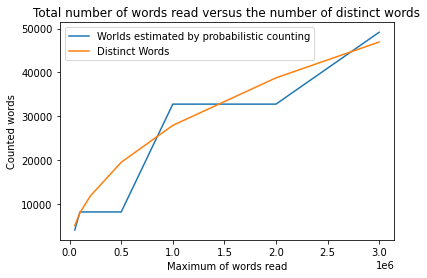

In [25]:

import matplotlib.pyplot as plt

# plotting the line 1 points 
plt.plot(max_words_values, words_prob_count, label = "Worlds estimated by probabilistic counting")

# plotting the line 2 points 
plt.plot(max_words_values, words_total_count, label = "Distinct Words")
  
# naming the x axis
plt.xlabel('Maximum of words read')
# naming the y axis
plt.ylabel('Counted words')
# giving a title to my graph
plt.title('Total number of words read versus the number of distinct words')
  
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()

<font size="+1">While we can clearly se that the number of words follows a Heap's Law it is not true for the estimation. Even if we can appreciate some similarities, since we are using powers of 2 it is not as accurate as it can be, also it would be slightly more accurate by using more points but not a big change.</font>

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>